In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('Vehicle.csv')
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Mileage
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,18.000032
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,15.000027
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,18.000032
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,16.000028
4,1,8,302.0,140,3449,10.5,1970,ford torino,17.000030


In [3]:
data = raw_data[raw_data.horsepower != '?']
data.shape

(392, 9)

In [4]:
data_1 = data.copy(deep = True)
data_1.origin = data_1.origin.astype('object')

In [5]:
data_1[["manufacturer", "model"]] = data_1["name"].str.split(" ", n=1, expand=True)
data_1.drop("name", axis=1, inplace=True)

In [6]:
errors = {
         "vokswagen" : "volkswagen", 
         "vw" : "volkswagen", 
         "toyouta" : "toyota", 
         "mercedes-benz" : "mercedes", 
         "chevroelt": "chevrolet",
         "chevy" : "chevrolet", 
         "maxda" : "mazda"
         }

data_1.manufacturer = data_1.manufacturer.map(errors).fillna(data_1.manufacturer)


In [7]:
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

data_1["model"] = data_1.model.apply(lambda x: alphanumeric(x))

print(len(data_1.model.unique()))



293


In [8]:
data_2 = data_1.copy(deep = True)

data_2['log_mileage'] = np.log(data_2.Mileage)

data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Mileage,manufacturer,model,log_mileage
0,1,8,307.0,130,3504,12.0,1970,18.000032,chevrolet,chevellemalibu,2.890374
1,1,8,350.0,165,3693,11.5,1970,15.000027,buick,skylark320,2.708052
2,1,8,318.0,150,3436,11.0,1970,18.000032,plymouth,satellite,2.890374
3,1,8,304.0,150,3433,12.0,1970,16.000028,amc,rebelsst,2.772590
4,1,8,302.0,140,3449,10.5,1970,17.000030,ford,torino,2.833215


In [9]:
data_3 = data_2.copy(deep = True)

#data_3.cylinders = data_3.cylinders.astype('object')

In [11]:
# check correlation
data_num = data_3.drop(['origin'],axis = 1)
corr = data_num.corr()
corr

,cylinders,displacement,weight,acceleration,year,Mileage,log_mileage
cylinders,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.777618,-0.826824
displacement,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.805127,-0.853691
weight,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.832244,-0.875658
acceleration,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.423329,0.447574
year,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.580541,0.577275
Mileage,-0.777618,-0.805127,-0.832244,0.423329,0.580541,1.000000,0.983909
log_mileage,-0.826824,-0.853691,-0.875658,0.447574,0.577275,0.983909,1.000000


<AxesSubplot:>

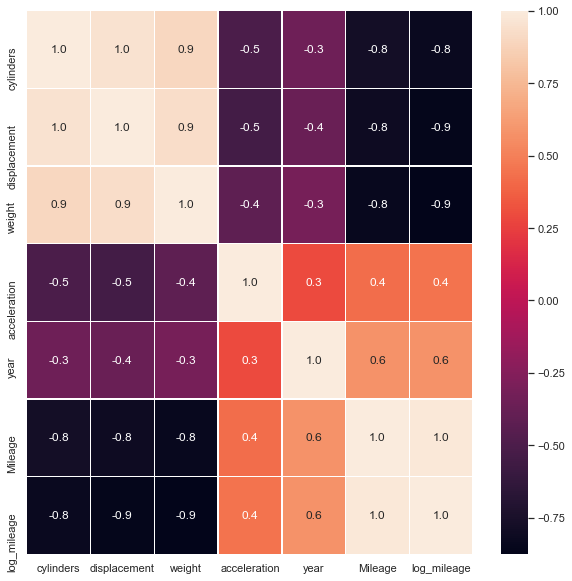

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [18]:
drop_list = ['manufacturer', 'model','origin','Mileage']
data_cleaned = data_3.drop(drop_list,axis = 1 )        
data_cleaned.tail()

,cylinders,displacement,horsepower,weight,acceleration,year,log_mileage
393,4,140.0,86,2790,15.6,1982,3.295839
394,4,97.0,52,2130,24.6,1982,3.784191
395,4,135.0,84,2295,11.6,1982,3.465738
396,4,120.0,79,2625,18.6,1982,3.332206
397,4,119.0,82,2720,19.4,1982,3.433989


In [21]:
data_cleaned.drop('log_mileage' , axis = 1).set_index('cylinders').to_csv('standard.csv')

In [22]:
data_cleaned.head()

,cylinders,displacement,horsepower,weight,acceleration,year,log_mileage
0,8,307.0,130,3504,12.0,1970,2.890374
1,8,350.0,165,3693,11.5,1970,2.708052
2,8,318.0,150,3436,11.0,1970,2.890374
3,8,304.0,150,3433,12.0,1970,2.772590
4,8,302.0,140,3449,10.5,1970,2.833215


In [24]:
# Scale Data
from sklearn.preprocessing import MinMaxScaler

x = data_cleaned.drop(['log_mileage'],axis = 1)

scaler = MinMaxScaler()
scaler.fit(x)



MinMaxScaler()

In [27]:
X = scaler.fit_transform(x)
y = data_cleaned.log_mileage

In [28]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (313, 6)
X_test  (79, 6)
y_train  (313,)
y_test  (79,)


In [30]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = OLS_model.predict(X_test)

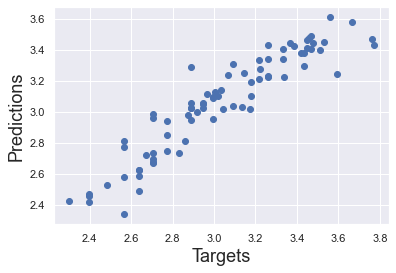

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [43]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred))



In [44]:
cols = ['Model', 'R-squared', 'Adj R-squared', 'RMSE']
result_tabulation = pd.DataFrame(columns = cols)
OLS_metrics = pd.Series({'Model': "OLS",
                 'R-squared' : r_squared_OLS, 'Adj R-squared' : Adj_r_squared_OLS , 'RMSE' :rmse_OLS})
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)
result_tabulation



,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.875432,0.871732,0.130526


In [47]:
# dump the model
import pickle

In [48]:
pickle.dump(OLS_model, open('performance.pkl', 'wb'))